<a href="https://colab.research.google.com/github/YuxingW/deep_learning/blob/main/hw3/partb1_pytorch_non_auto_differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Pytorch tensor datastructure without auto differentiation

In [1]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)

#### 3d-2d non-linear data generation

In [2]:
n_samples = 200
d1 = 3
d2 = 2
x = torch.FloatTensor(n_samples, d1).uniform_(-1,1)

weights_true = torch.FloatTensor([[5, 1, 4],[2, 1, 2]]).T
bias_true = torch.tensor([0.25, 0.1])

y = torch.mm(x ** 2, weights_true) + torch.mm(x, weights_true) + bias_true

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y.shape}')

x: torch.Size([200, 3]), weights: torch.Size([3, 2]), bias: torch.Size([2]), y: torch.Size([200, 2])


#### Define model and loss

In [3]:
def model(x, weights, bias):
    return torch.mm(x, weights) + bias

In [4]:
def loss_fn(y_pred, y_true):
    squared_diffs = (y_pred - y_true)**2
    return squared_diffs.mean()

####Initialize weights and bias for model

In [5]:
weights = torch.FloatTensor([[2, 1, 1],[1, 2, 1]]).T
bias = torch.tensor([0.1, 0.1])

In [6]:
import torch.optim as optim

####Initialize learning rate and optimizer

In [7]:
#params = torch.tensor([1.0, 1.0, 1.0, 0.0], requires_grad=False)
learning_rate = 1e-5
optimizer = optim.SGD([weights, bias,], lr=learning_rate)

####Do one step training

In [8]:
y_pred = model(x, weights, bias)
loss = loss_fn(y_pred, y)
#loss.backward()

optimizer.step()

y_pred.shape

torch.Size([200, 2])

####Do training loop with 5000 eporches

In [9]:
def training_loop(n_epochs, optimizer, weights, bias, x, y):
    for epoch in range(1, n_epochs + 1):
        y_pred = model(x, weights, bias) 
        loss = loss_fn(y_pred, y)
        
        optimizer.zero_grad()
        #loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return y_pred

In [10]:
y_pred = training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    weights = weights,
    bias = bias,
    x = x,
    y = y)

Epoch 500, Loss 15.750105
Epoch 1000, Loss 15.750105
Epoch 1500, Loss 15.750105
Epoch 2000, Loss 15.750105
Epoch 2500, Loss 15.750105
Epoch 3000, Loss 15.750105
Epoch 3500, Loss 15.750105
Epoch 4000, Loss 15.750105
Epoch 4500, Loss 15.750105
Epoch 5000, Loss 15.750105


####Plot the output and the real data using tsne

In [11]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_comparison(y_true, y_pred):
  #tsne = TSNE(n_components=2, perplexity=50, learning_rate=100, random_state=120)
  tsne = TSNE(n_components=2, random_state=0)
  yt_2d = tsne.fit_transform(y_true)
  yp_2d = tsne.fit_transform(y_pred)

  plt.figure(figsize=(6, 5))
  plt.scatter(yt_2d[:, 0], yt_2d[:, 1], c='b', label='y_true')
  plt.scatter(yp_2d[:, 1], yp_2d[:, 1], c='y', label='y_pred')
  plt.legend()
  plt.title('TSNE Y_True Y_Pred Comparison')
  plt.xlabel('t_SNE1')
  plt.xlabel('t_SNE2')
  plt.show()

def plot_distribution(x, y_true, y_pred):
  tsne = TSNE(n_components=1, random_state=0)
  x_2d = tsne.fit_transform(x)
  yt_2d = tsne.fit_transform(y_true)
  yp_2d = tsne.fit_transform(y_pred)

  plt.figure(figsize=(6, 5))
  plt.scatter(x_2d[:, 0], yt_2d[:, 0], c='b', label='y_true')
  plt.scatter(x_2d[:, 0], yp_2d[:, 0], c='y', label='y_pred')
  plt.legend()
  plt.title('TSNE Y_True Y_Pred Distribution with X')
  plt.show()

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='y_true')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='y_pred')
  plt.legend()

In [13]:
y_pred_np = y_pred.detach().numpy()
y_true_np = y.detach().numpy()
x_np = x.detach().numpy()

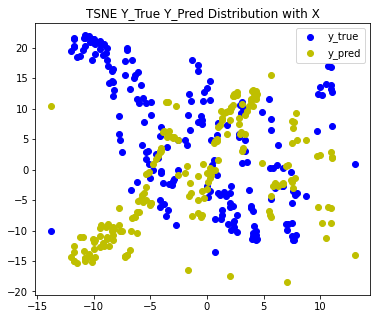

In [14]:
plot_distribution(x_np, y_true_np, y_pred_np)

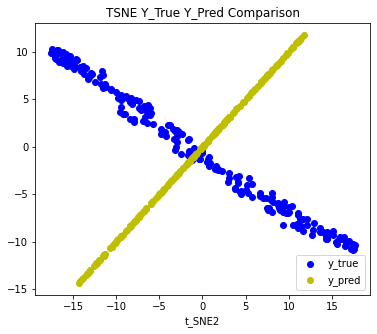

In [15]:
plot_comparison(y_true_np, y_pred_np)

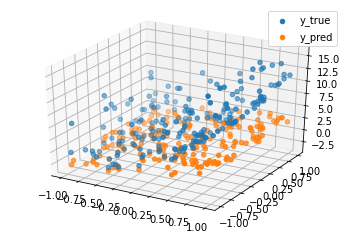

In [17]:
plot_3d(x_np, y_true_np[:, 0], y_pred=y_pred_np[:, 0])

Because there is no auto differentiation and back propagation, the y_pred is not converging to y_true.